In [1]:
import glob
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

evaluation_methods = ['ari', 'nmi', 'purity']
ari_best_result = dict()
nmi_best_result = dict()
purity_best_result = dict()


In [2]:
total = 0
for dirs in glob.glob('gamma_01_23/*'):
    for em in evaluation_methods:
        with open(dirs + '/' + em + '/total_best_result.txt') as f:
            lines = f.read().splitlines()
            for i, line in enumerate(lines):
                if i == 0: continue
                line = line.split('=')[-1].split(':')
                k, v = line[0].strip(), line[-1].strip()
                if em == 'ari':
                    if k in ari_best_result:
                        ari_best_result[k] += float(v)
                    else:
                        ari_best_result[k] = float(v)
                elif em == 'nmi':
                    if k in nmi_best_result:
                        nmi_best_result[k] += float(v)
                    else:
                        nmi_best_result[k] = float(v)
                else:
                    if k in purity_best_result:
                        purity_best_result[k] += float(v.split('%')[0])
                    else:
                        purity_best_result[k] = float(v.split('%')[0])
    total += 1


In [3]:
for k, v in ari_best_result.items():
    ari_best_result[k] = round(v / total, 3)
for k, v in nmi_best_result.items():
    nmi_best_result[k] = round(v / total, 3)
for k, v in purity_best_result.items():
    purity_best_result[k] = round(v / (total * 100), 3)

print(ari_best_result)
print(nmi_best_result)
print(purity_best_result)

{'jideca_b05g01re_23': 0.328, 'jideca_b10g01re_23': 0.302, 'jideca_b01g01re_23': 0.292, 'jideca_b1g01re_23': 0.266, 'jideca_b02g01re_23': 0.239, 'jideca_b1g01se_23': 0.237, 'jideca_b05g01se_23': 0.214, 'jideca_b10g01se_23': 0.18, 'jideca_b02g01se_23': 0.183, 'jideca_b01g01se_23': 0.174}
{'jideca_b05g01re_23': 0.579, 'jideca_b10g01re_23': 0.551, 'jideca_b1g01re_23': 0.525, 'jideca_b01g01re_23': 0.531, 'jideca_b02g01re_23': 0.511, 'jideca_b1g01se_23': 0.495, 'jideca_b05g01se_23': 0.486, 'jideca_b01g01se_23': 0.459, 'jideca_b10g01se_23': 0.431, 'jideca_b02g01se_23': 0.421}
{'jideca_b05g01re_23': 0.315, 'jideca_b10g01re_23': 0.352, 'jideca_b01g01re_23': 0.346, 'jideca_b1g01re_23': 0.297, 'jideca_b02g01se_23': 0.287, 'jideca_b1g01se_23': 0.289, 'jideca_b05g01se_23': 0.264, 'jideca_b10g01se_23': 0.247, 'jideca_b01g01se_23': 0.275, 'jideca_b02g01re_23': 0.31}


In [4]:
df_ari = pd.DataFrame(list(ari_best_result.items()), columns=['parameters', 'ari'])
df_nmi = pd.DataFrame(list(nmi_best_result.items()), columns=['parameters', 'nmi'])
df_purity = pd.DataFrame(list(purity_best_result.items()), columns=['parameters', 'purity'])


df_ari['simple'] = df_ari['parameters'].apply(lambda x: x.split('_')[1].split('g')[0][1:])
#df_ari['simple'] = df_ari['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_ari['simple'] = df_ari['simple'].apply(lambda x: '0.' + x[1] if x[0] == '0' else x)
df_ari['types'] = df_ari['parameters'].apply(lambda x:x.split('_')[1][-2:])
df_ari['types'] = df_ari['types'].apply(lambda x: 'real' if x == 're' else 'semantic')

df_nmi['simple'] = df_nmi['parameters'].apply(lambda x:x.split('_')[1].split('g')[0][1:])
#df_nmi['simple'] = df_nmi['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_nmi['simple'] = df_nmi['simple'].apply(lambda x: '0.' + x[1] if x[0] == '0' else x)
df_nmi['types'] = df_nmi['parameters'].apply(lambda x:x.split('_')[1][-2:])
df_nmi['types'] = df_nmi['types'].apply(lambda x: 'real' if x == 're' else 'semantic')

df_purity['simple'] = df_purity['parameters'].apply(lambda x:x.split('_')[1].split('g')[0][1:])
#df_purity['simple'] = df_purity['simple'].apply(lambda x: float('0.' + x[1]) if x[0] == '0' else float(x))
df_purity['simple'] = df_purity['simple'].apply(lambda x: '0.' + x[1] if x[0] == '0' else x)
df_purity['types'] = df_purity['parameters'].apply(lambda x:x.split('_')[1][-2:])
df_purity['types'] = df_purity['types'].apply(lambda x: 'real' if x == 're' else 'semantic')


In [5]:
df_ari.to_csv('../result/jideca_ari_means_g01_23.csv')
df_nmi.to_csv('../result/jideca_nmi_means_g01_23.csv')
df_purity.to_csv('../result/jideca_purity_means_g01_23.csv')
df_purity.loc[df_purity['types'] != 'real'].sort_values(by='simple')

,parameters,purity,simple,types
8,jideca_b01g01se_23,0.275,0.1,semantic
4,jideca_b02g01se_23,0.287,0.2,semantic
6,jideca_b05g01se_23,0.264,0.5,semantic
5,jideca_b1g01se_23,0.289,1,semantic
7,jideca_b10g01se_23,0.247,10,semantic


In [6]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

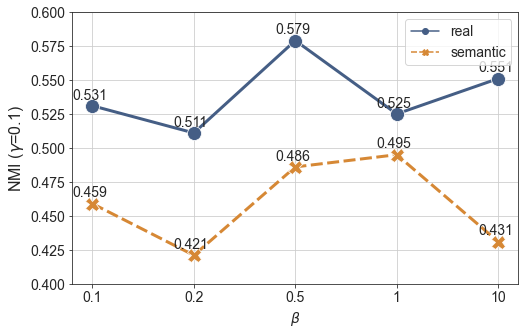

In [7]:
plt.figure(figsize=(8,5))
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#455E85', '#D68835']
sns.lineplot(x='simple', y='nmi', data=df_nmi.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', markers=True, markersize=14)
for i in df_nmi.groupby('types'):
    for x,y,m in i[1][['simple','nmi','nmi']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.0051, m)
plt.ylim(0.4, 0.6)
plt.ylabel('NMI' + r' ($\gamma$=0.1)', fontsize=16)
plt.xlabel(r'$\beta$')
plt.legend(loc='best')
plt.savefig('../result/gamma_23_01_nmi_means.png', transparent=True)

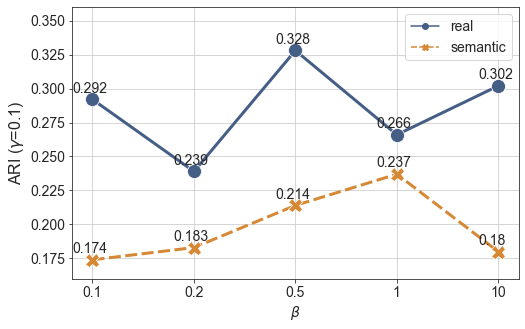

In [8]:
plt.figure(figsize=(8,5))
sns.lineplot(x='simple', y='ari', data=df_ari.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', markers=True, markersize=14)
for i in df_ari.groupby('types'):
    for x,y,m in i[1][['simple','ari','ari']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.0051, m)
plt.ylim(0.16, 0.36)
plt.ylabel('ARI' + r' ($\gamma$=0.1)', fontsize=16)
plt.xlabel(r'$\beta$')
plt.legend(loc='best')
plt.savefig('../result/gamma_23_01_ari_means.png', transparent=True)

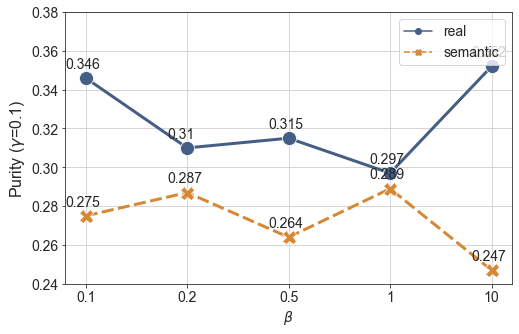

In [9]:
plt.figure(figsize=(8,5))

sns.lineplot(x='simple', y='purity', data=df_purity.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', markers=True, markersize=14)
for i in df_purity.groupby('types'):
    for x,y,m in i[1][['simple','purity','purity']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.0051, m)
plt.ylim(0.24, 0.38)
plt.ylabel('Purity' + r' ($\gamma$=0.1)', fontsize=16)
plt.xlabel(r'$\beta$')
plt.legend(loc='best')
plt.savefig('../result/gamma_23_01_purity_means.png', transparent=True)

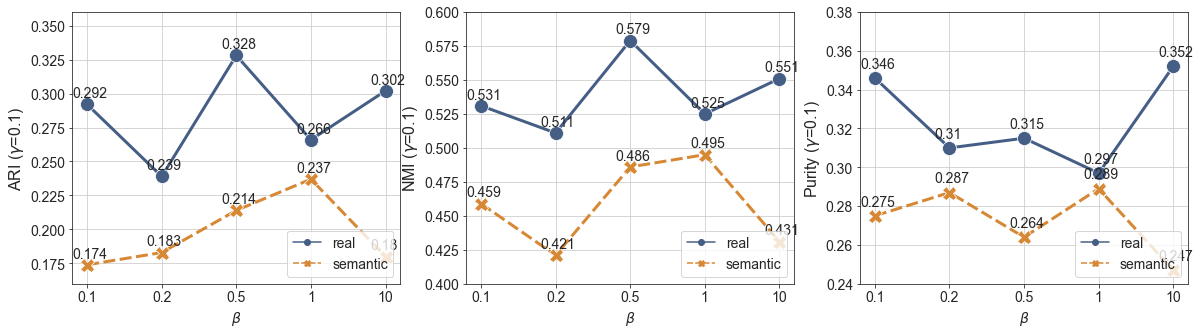

In [10]:
plt.figure(figsize=(20,5))
colors = ['#455E85', '#D68835']

plt.subplot(1, 3, 1)
sns.lineplot(x='simple', y='ari', data=df_ari.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', markers=True, markersize=14)
for i in df_ari.groupby('types'):
    for x,y,m in i[1][['simple','ari','ari']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.0051, m)
plt.ylim(0.16, 0.36)
plt.ylabel('ARI' + r' ($\gamma$=0.1)', fontsize=16)
plt.xlabel(r'$\beta$')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
sns.lineplot(x='simple', y='nmi', data=df_nmi.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', markers=True, markersize=14)
for i in df_nmi.groupby('types'):
    for x,y,m in i[1][['simple','nmi','nmi']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.0051, m)
plt.ylim(0.4, 0.6)
plt.ylabel('NMI' + r' ($\gamma$=0.1)', fontsize=16)
plt.xlabel(r'$\beta$')
plt.legend(loc='lower right')

plt.subplot(1, 3, 3)
sns.lineplot(x='simple', y='purity', data=df_purity.sort_values(by='simple'), linewidth=3, palette=colors, hue='types', style='types', markers=True, markersize=14)
for i in df_purity.groupby('types'):
    for x,y,m in i[1][['simple','purity','purity']].values:
        if x == '0.1': i = 0
        elif x == '0.2': i = 1
        elif x == '0.5': i = 2
        elif x == '1': i = 3
        else: i = 4
        plt.text(i - 0.2 , y + 0.0051, m)
plt.ylim(0.24, 0.38)
plt.ylabel('Purity' + r' ($\gamma$=0.1)', fontsize=16)
plt.xlabel(r'$\beta$')
plt.legend(loc='lower right')